#Note: please use GPU runtime to speed up the execution for this notebook.

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Load mnist dataset

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

### Show a random image

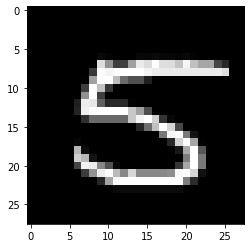

In [3]:
which = np.random.randint(x_train.shape[0])
plt.imshow(x_train[which], cmap="gray")

In [4]:
which

20890

In [5]:
buffer = dict()

def fib(n):
  """
  return the n's fibonacci number
  """
  if n in buffer:
    return buffer[n]
  if n<= 2:
    return 1
  result = fib(n-1) + fib(n-2)
  buffer[n] = result
  return result

## Visualizing each principal component

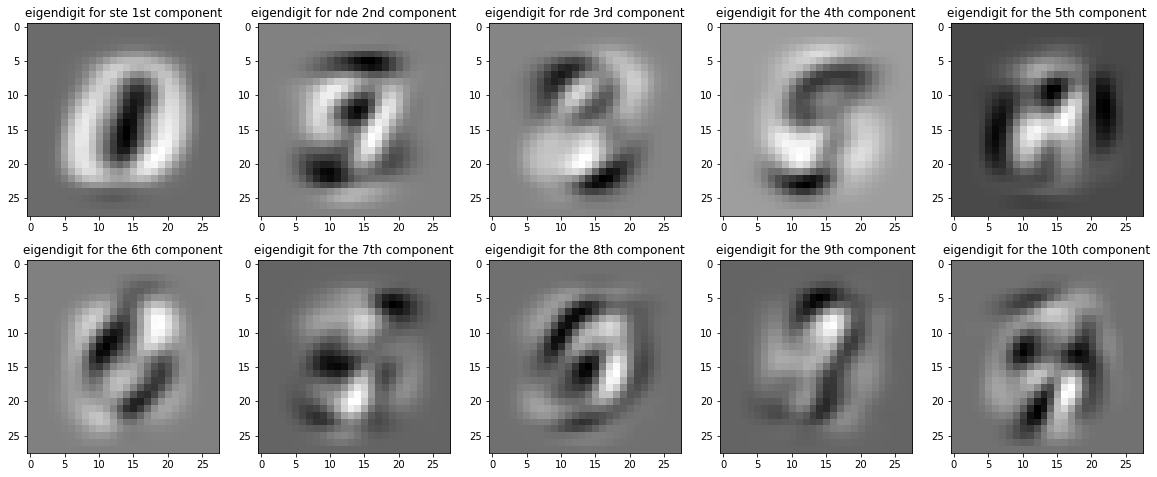

In [6]:
# Fit a PCA model with 10 components
pca = PCA(n_components=10)
pca.fit(x_train.reshape(x_train.shape[0], -1))

plt.figure(figsize = (20, 8))
for i in range(10):
  ax = plt.subplot(2, 5, i+1)
  plt.imshow(pca.components_[i, :].reshape(28, 28), cmap="gray")
  title = f"eigendigit for the {i+1}th component"
  if i == 0:
    title = title.replace('th', 'st')
  elif i == 1:
    title = title.replace('th', 'nd')
  elif i == 2:
    title = title.replace('th', 'rd')
  ax.set_title(title)

## Effect of reconstruction using the top k principle components

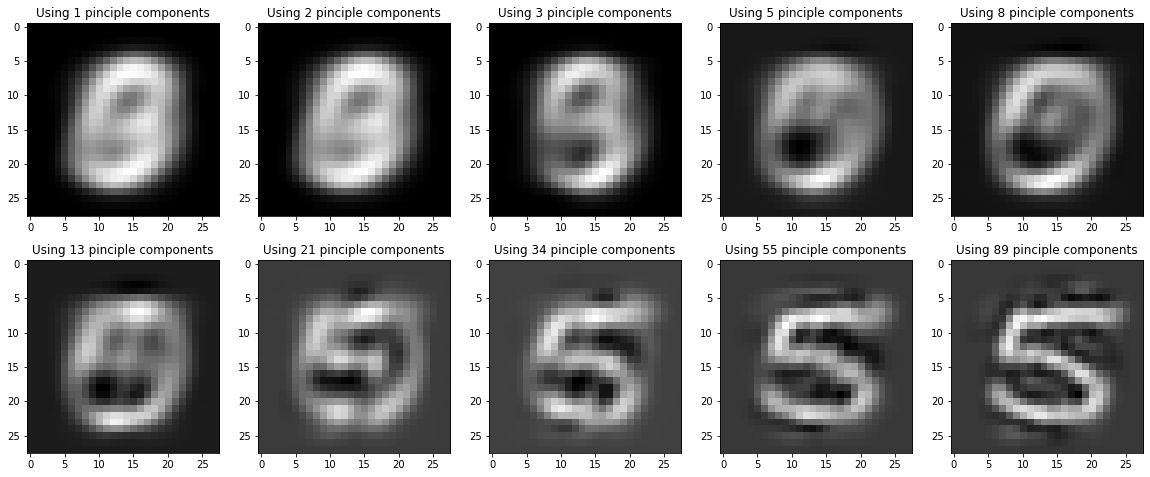

In [7]:
plt.figure(figsize = (20, 8))
for i in range(1, 11):
  ax = plt.subplot(2, 5, i)
  pca = PCA(n_components=fib(i+1))
  pca.fit(x_train.reshape(x_train.shape[0], -1))

  # Compute the code of the sampled image
  code = pca.transform(x_train[which].reshape(1, -1))

  # Compute the reconstructed image
  reconstructed = pca.inverse_transform(code)
  
  plt.imshow(reconstructed.reshape(x_train.shape[1], -1), cmap="gray")
  ax.set_title(f"Using {fib(i+1)} pinciple components")


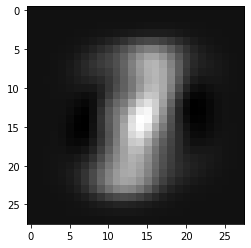

In [11]:
pca = PCA(n_components=2)
pca.fit(x_train.reshape(x_train.shape[0], -1))

# Reconstruct the 11'th training image
code = pca.transform(x_train[11].reshape(1, -1))
plt.imshow(pca.inverse_transform(code).reshape(28, 28), cmap='gray')

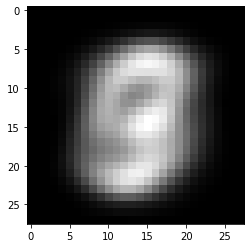

In [11]:
# Reconstruct a randomly generated code
random_code = np.random.rand(2)
plt.imshow(pca.inverse_transform(random_code).reshape(28, 28), cmap='gray')

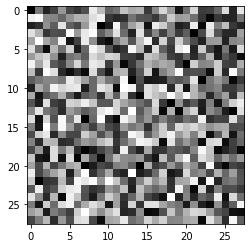

In [12]:
# A random image
plt.imshow(np.random.rand(28, 28), cmap='gray')

## Visualizing Principal components

(-3.019042068766703, 3.271550829363233, -1.029312447435016, 1.302811531441772)

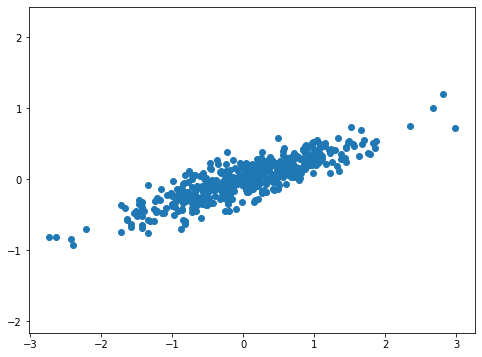

In [23]:
rng = np.random.RandomState(1)

# Rotate and scale a 2D standard normal distribution
X = np.dot(rng.rand(2, 2), rng.randn(2, 500)).T

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [24]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

(-3.019042068766703, 3.271550829363233, -1.029312447435016, 1.302811531441772)

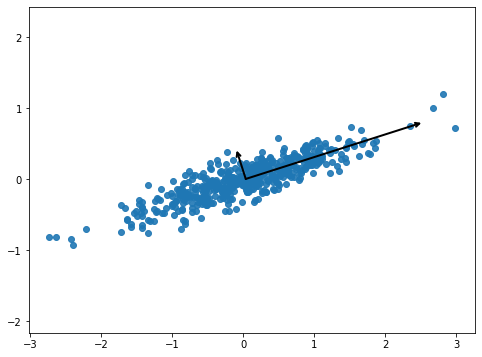

In [26]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.9)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

### In the new space, the data will be again normal distributed with zero mean and a diagnal covariance matrix

In [27]:
transformed = pca.transform(X)

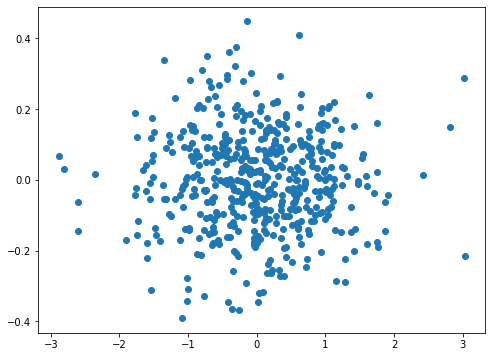

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed[:, 0], transformed[:, 1])

## MNIST PCA visualization

In [29]:
# Data-preprocessing: Standardizing the data
standardized_train = StandardScaler().fit_transform(x_train.reshape(x_train.shape[0], -1))
transformed_train = PCA(n_components=2).fit_transform(standardized_train)

y_train = y_train.reshape(y_train.shape[0], 1)

# appending label to the 2d projected data(vertical stack)
new_coordinates = np.hstack((transformed_train, y_train))

# creating a new data frame for ploting the labeled points.
df_pca = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(df_pca.head())

   1st_principal  2nd_principal  label
0      -0.921934      -4.813114    5.0
1       8.708936      -7.754932    0.0
2       2.328487       9.431644    4.0
3      -6.582020      -3.745479    1.0
4      -5.183215       3.133443    9.0


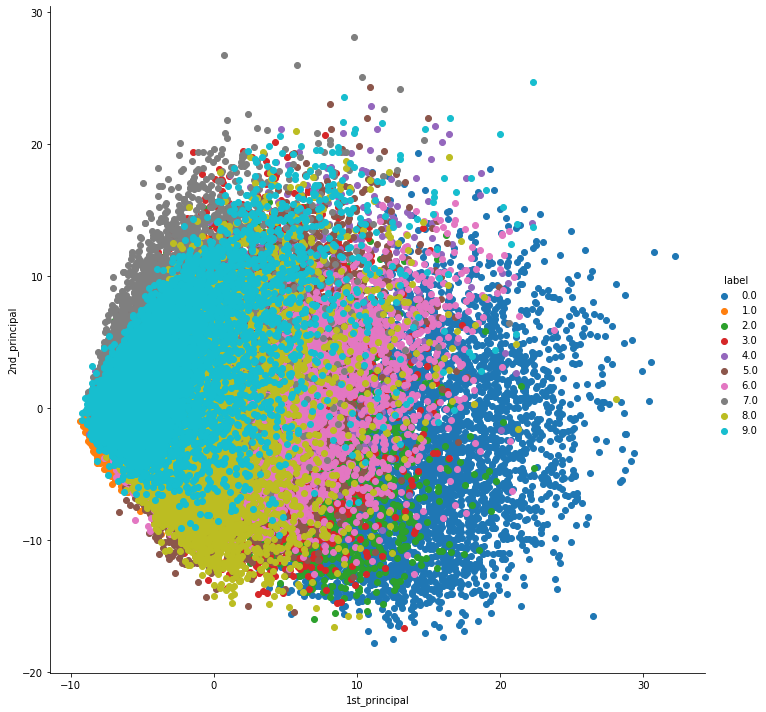

In [30]:
# ploting the 2d data points with seaborn
sns.FacetGrid(df_pca, hue="label", height=10).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## Determine the optimal number of principal components

In [31]:
pca = PCA(n_components=700)
pca.fit(standardized_train)

PCA(copy=True, iterated_power='auto', n_components=700, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

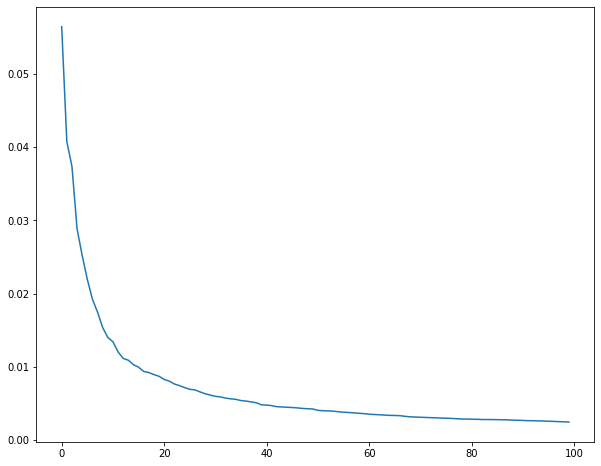

In [32]:
plt.figure(figsize=(10, 8))
plt.plot(pca.explained_variance_ratio_[:100])

### Visualize the top 15 explained variances

Text(0.5, 1.0, 'Explained Variances')

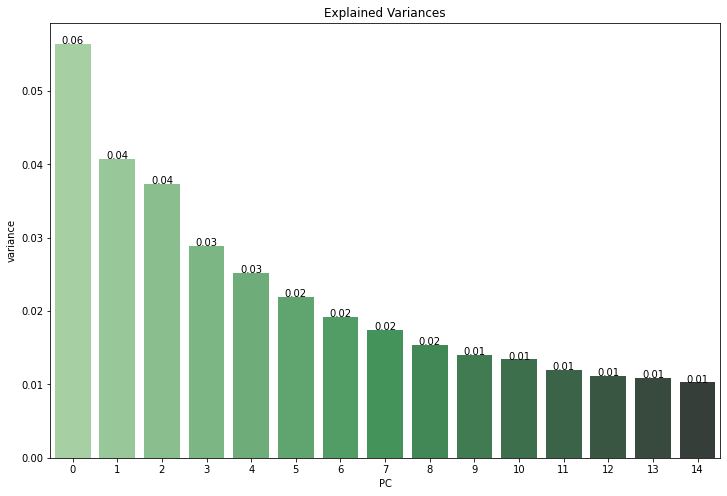

In [23]:
plt.figure(figsize=(12, 8))

df = pd.DataFrame({'PC': range(15), 'variance':pca.explained_variance_ratio_[:15]})

pal = sns.color_palette("Greens_d", len(df))
rank = df["variance"].argsort().argsort() 
g=sns.barplot(x='PC',y='variance',data=df, palette=np.array(pal[::-1])[rank])

for index, row in df.iterrows():
    g.text(row.name,row.variance, round(row.variance,2), color='black', ha="center")
g.set_title('Explained Variances')

## Autoencoders
In this section, we will build a few autoencoders, where the deep autoencoder will lead to a lower reconstruction error and a better seperation using the learned code.

In [33]:
def build_shallow_autoencoder(input_dim=784, encoding_dim=30):
  """
  Build a shallow autoencoder and also returns its encoder and decoder
  """
  # this is our input placeholder
  input_img = Input(shape=(input_dim,))

  # "encoded" is the encoded representation of the input
  encoded = Dense(encoding_dim, activation='relu')(input_img)

  # "decoded" is the lossy reconstruction of the input
  decoded = Dense(input_dim, activation='sigmoid')(encoded)
  # decoded = Dense(input_dim, activation='linear')(encoded)

  # this model maps an input to its reconstruction
  autoencoder = Model(input_img, decoded)

  # this model maps an input to its encoded representation
  encoder = Model(input_img, encoded)

  # create a placeholder for an encoded (32-dimensional) input
  encoded_input = Input(shape=(encoding_dim,))

  # retrieve the last layer of the autoencoder model
  decoder_layer = autoencoder.layers[-1]

  # create the decoder model
  decoder = Model(encoded_input, decoder_layer(encoded_input))
  
  # binary_crossentropy loss leads to better performance
  autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')
  # autoencoder.compile(optimizer='nadam', loss='mean_squared_error')

  return autoencoder, encoder, decoder

In [35]:
shallow_autoencoder, shallow_encoder, shallow_decoder = build_shallow_autoencoder(input_dim=784, encoding_dim=30)

In [39]:
shallow_autoencoder.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               24304     
Total params: 47,854
Trainable params: 47,854
Non-trainable params: 0
_________________________________________________________________


In [36]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)

In [37]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

### Visualize the distribution of pixel values. We can see that most of the pixel values are either 0 or 1.

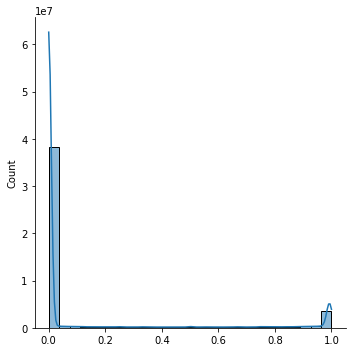

In [38]:
explore = x_train.reshape(np.prod(x_train.shape))
sns.displot(explore, kde=True)

### Visualize the top 20 most common values and their proportion

In [31]:
unique, counts = np.unique(explore, return_counts=True)
counts_perc = np.round(counts / len(explore), 4)
check_occ = pd.DataFrame({'value':unique, 'percentage':counts_perc})
check_occ.sort_values(by='count', ascending=False)[:20]

,value,count
0,0.000000,0.8088
253,0.992157,0.0322
254,0.996078,0.0170
252,0.988235,0.0139
255,1.000000,0.0067
251,0.984314,0.0025
128,0.501961,0.0016
250,0.980392,0.0013
191,0.749020,0.0011
64,0.250980,0.0010


In [40]:
# Start the training process

history = shallow_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2714 - val_loss: 0.1910
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1719 - val_loss: 0.1542
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1448 - val_loss: 0.1346
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1296 - val_loss: 0.1231
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1198 - val_loss: 0.1149
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1132 - val_loss: 0.1094
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1086 - val_loss: 0.1054
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1051 - val_loss: 0.1024
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1025 - val_loss: 0.1002
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1005 - val_loss: 0.0988

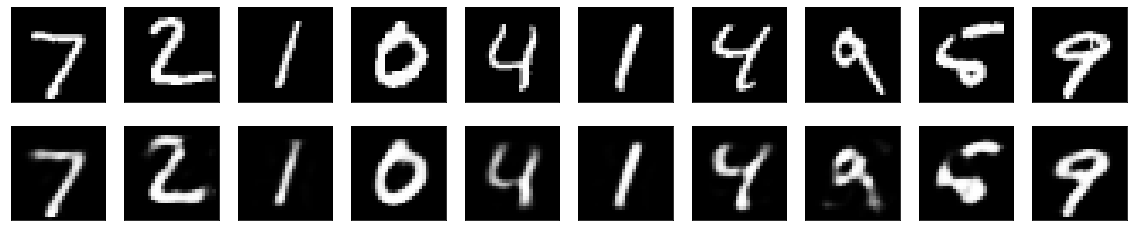

In [41]:
# encode and decode some digits
# note that we take them from the *test* set
shallow_encoded_imgs = shallow_encoder.predict(x_test)
shallow_decoded_imgs = shallow_decoder.predict(shallow_encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(shallow_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [82]:
def build_deep_autoencoder(input_dim=784, encode_dim=30):
  """
  Build a deep autoencoder and also returns its encoder and decoder
  """
  input_img = Input(shape=(input_dim,))
  encoded = Dense(1000, activation='relu')(input_img)
  encoded = Dense(500, activation='relu')(encoded)
  encoded = Dense(250, activation='relu')(encoded)

  # bottleneck layer
  encoded = Dense(encode_dim, activation='relu')(encoded)

  decoded = Dense(250, activation='relu')(encoded)
  decoded = Dense(500, activation='relu')(decoded)
  decoded = Dense(1000, activation='relu')(decoded)
  decoded = Dense(input_dim, activation='sigmoid')(decoded)

  autoencoder = Model(input_img, decoded)

  # this model maps an input to its encoded representation
  encoder = Model(input_img, encoded)

  # create a placeholder for an encoded (30-dimensional) input
  encoded_input = Input(shape=(encode_dim,))

  # retrieve the last layers of the autoencoder model
  decoder_layer1, decoder_layer2, decoder_layer3, decoder_layer4 = \
        autoencoder.layers[-1], autoencoder.layers[-2], autoencoder.layers[-3], autoencoder.layers[-4]

  # create the decoder model
  decoder = Model(encoded_input, decoder_layer1(decoder_layer2(decoder_layer3(decoder_layer4(encoded_input)))))

  autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

  return autoencoder, encoder, decoder


deep_autoencoder, deep_encoder, deep_decoder = build_deep_autoencoder(input_dim=784, encode_dim=30)

print (deep_autoencoder.summary())
history = deep_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Model: "functional_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_95 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_96 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_97 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_98 (Dense)             (None, 30)                7530      
_________________________________________________________________
dense_99 (Dense)             (None, 250)               7750      
_________________________________________________________________
dense_100 (Dense)            (None, 500)             

In [45]:
# encode and decode some digits
# note that we take them from the test set
deep_encoded_imgs = deep_encoder.predict(x_test)
deep_decoded_imgs = deep_decoder.predict(deep_encoded_imgs)

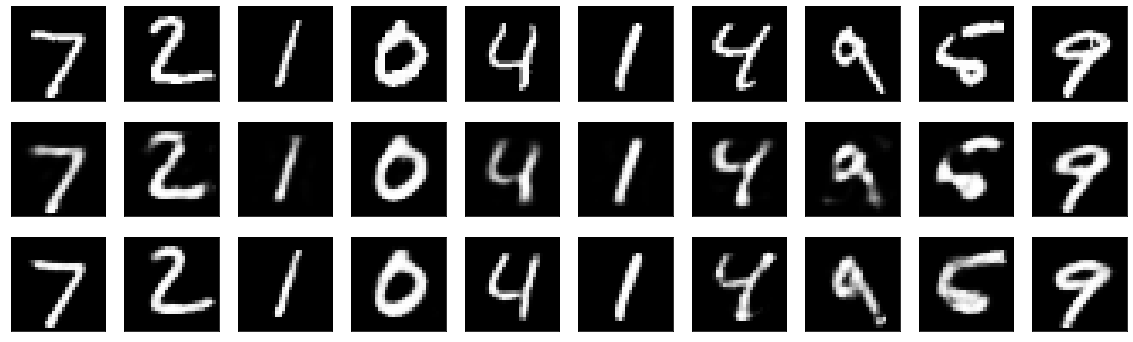

In [46]:
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction of the shallow autoencoder
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(shallow_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction of the deep autoencoder
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(deep_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## What about visualization on 2D?



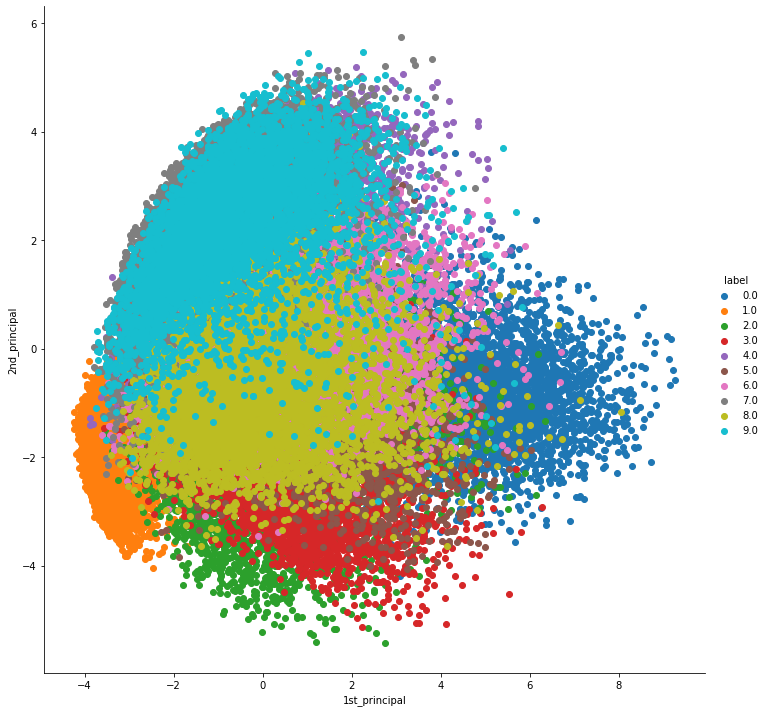

In [79]:
# Recall 2D visualization of PCA

pca_transformed_data = PCA(n_components=2).fit_transform(x_train)

y_train = y_train.reshape(y_train.shape[0], 1)

# appending label to the 2d projected data(vertical stack)
new_coordinates = np.hstack((pca_transformed_data, y_train))

# creating a new data frame for ploting the labeled points.
df_pca = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))

# ploting the 2d data points with seaborn
sns.FacetGrid(df_pca, hue="label", height=10).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3821 - val_loss: 0.2806
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2716 - val_loss: 0.2611
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2562 - val_loss: 0.2512
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2503 - val_loss: 0.2474
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2473 - val_loss: 0.2449
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2452 - val_loss: 0.2431
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2436 - val_loss: 0.2417
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2424 - val_loss: 0.2405
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2413 - val_loss: 0.2396
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2403 - val_loss: 0.2387

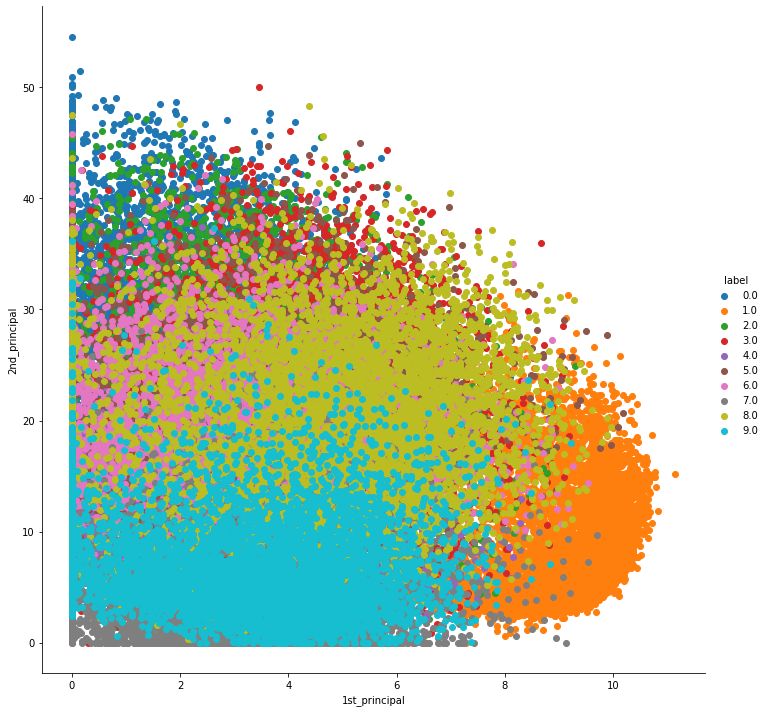

In [80]:
# Visualization of code distribution using shallow autoencoder
two_D_shallow_autoencoder, two_D_shallow_encoder, _ = build_shallow_autoencoder(input_dim=784, encoding_dim=2)
history = two_D_shallow_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
shallow_coding = two_D_shallow_encoder.predict(x_train)

# appending label to the 2d projected data(vertical stack)
new_coordinates = np.hstack((shallow_coding, y_train))

# creating a new data frame for ploting the labeled points.
df_shallow = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))

# ploting the 2d data points with seaborn
sns.FacetGrid(df_shallow, hue="label", height=10).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()

Epoch 1/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2608 - val_loss: 0.2458
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2244 - val_loss: 0.2070
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2001 - val_loss: 0.1954
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1926 - val_loss: 0.1896
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1884 - val_loss: 0.1876
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1865 - val_loss: 0.1901
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1836 - val_loss: 0.1818
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1830 - val_loss: 0.1916
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1824 - val_loss: 0.1859
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1783 - val_loss: 0.1812

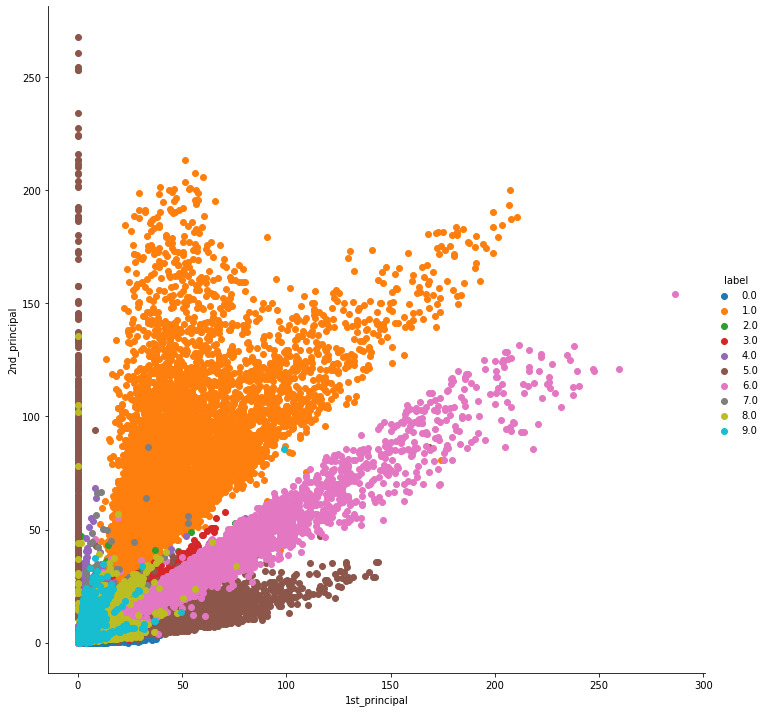

In [84]:
# Visualize the code distribution using deep autoencoder
two_D_deep_autoencoder, two_D_deep_encoder, _ = build_deep_autoencoder(input_dim=784, encode_dim=2)
history = two_D_deep_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

deep_coding = two_D_deep_encoder.predict(x_train)

# appending label to the 2d projected data(vertical stack)
new_coordinates = np.hstack((deep_coding, y_train))

# creating a new data frame for ploting the labeled points.
df_deep = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))

# ploting the 2d data points with seaborn
sns.FacetGrid(df_deep, hue="label", height=10).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()